In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Math Behind linear regression

#### First let's see how you can create random or fake data if do not have dataset
#### For regression problem we use 'make_regression' function, let's import first library

#### For simple understanding of their hyperparameter

###### n_samples:	How many students? (Number of data points in the dataset)
###### n_features:	How many factors affect the score? (e.g., study hours, sleep, number of practice tests)
###### noise:	How messy is the data? (Real-world data is not perfect; this adds randomness)
###### n_targets:	How many things are we predicting? (e.g., only one exam score OR multiple subjects)
###### bias:	Base score without studying (Affects how high/low the target values start)

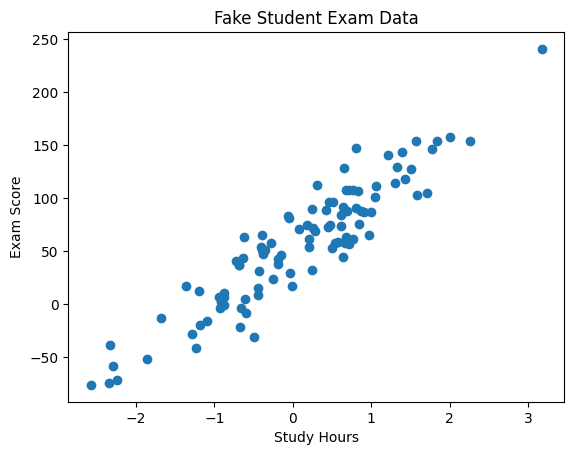

In [133]:
from sklearn.datasets import make_regression
# Create 100 students' data with 1 feature (study hours) and some randomness
X, y = make_regression(n_samples=100, n_features=1, noise=20, bias=50)

# Plot the data
plt.scatter(X, y)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Fake Student Exam Data")
plt.show()

# Each point represents a student.
# noise=20 makes scores not perfectly predictable (like real life)
# bias=50 means even without studying, students score around 50

#### First let's see how you can create random or fake data if do not have dataset
#### For classification problem we use 'make_classification' function, let's import first library

#### For simple understanding of their hyperparameter

###### n_samples:	How many students? (Number of data points)
###### n_features	How many factors affect the result? (e.g., study hours, sleep, notes taken)
###### n_classes	How many categories? (e.g., "pass" vs. "fail" = 2, "A/B/C grades" = 3)
###### n_informative	How many features actually matter? (e.g., study hours may be important, but the color of their backpack isn’t)
###### flip_y	How much random noise? (Some students may pass despite bad habits)

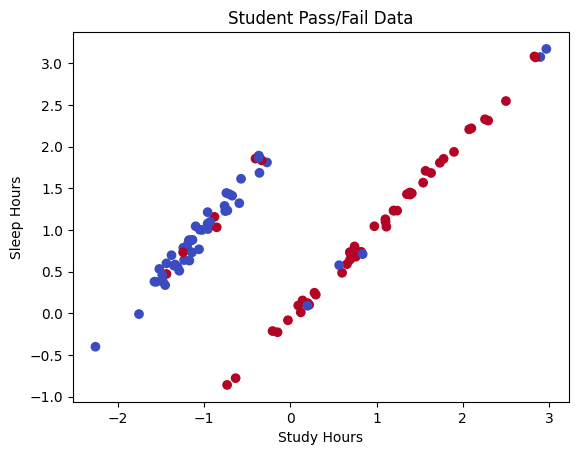

In [134]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create 100 students' data with 2 features (study hours & sleep) for pass/fail
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Student Pass/Fail Data")
plt.show()

# Explanation:

# Each dot is a student (red = fail, blue = pass)
# Study hours & sleep affect passing, but flip_y=0.1 means 10% of results are unpredictable (some students fail even after studying)

# some important points
# Removed n_classes=2 (not a valid parameter) if you are using
# Ensured n_informative + n_redundant + n_repeated ≤ n_features
# Set n_redundant=0 to match n_features=2
# Set n_clusters_per_class=1 (default is 2, which may lead to errors)

In [ ]:
# Or you can use synthetic data 
np.random.seed(42)     # This is very useful you can inset any number but if you want to match data with mine you can use my code so our output will be same

X = 2 * np.random.rand(100,1)           # Create 100 random numbers between 0 and 2
# print(X)          # Just incase how actully number are seen
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise
# print(y)          # Just incase how actully number are seen

plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data for Linear Regression")
plt.show()

## Now get into mathematical formulation

In [ ]:
def cost_fun(X,y,m,b):
    n = len(X)      # Number of data points
    prediction = m * X + b  # eq. of line, Predict y using the current slope (m) and intercept (b)
    error = y - prediction  # actual_value - predicted value
    mse = np.sum(error ** 2)/n  # mean square error     # for mse you can see formula in documentation
    return mse

In [ ]:
# let's implement gradient descent: it is basically use to find minimum low or used to minimize the cost function
def gradient_descent(X,y,m,b,learning_rate, epochs):           # learning rate reduce size of step and epochs tells us how many times this will run
    n = len(X)  # Number of data points
    for _ in range(epochs): # Repeat for a number of iterations (epochs), already explain
        prediction = m* X + b       ## Predict y using the current slope (m) and intercept (b)
        error = y-prediction
        
        m -=learning_rate * (-2/n) * np.sum(X * error)
        b -= learning_rate * (-2/n) * np.sum(error)
    return m,b

###### cost = (1/m) * sum([val**2 for val in (y - y_pred)])  # Cost function


Slope (m): 2.7701133864384917
Intercept (b): 4.215096157546739


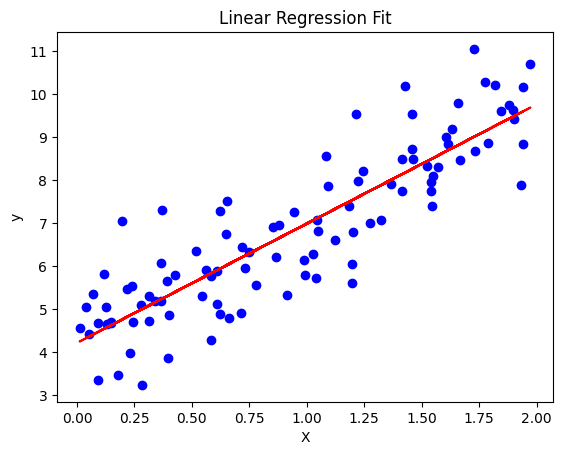

In [ ]:
# let's train the model
m = 0  # Start with a slope of 0
b = 0  # Start with an intercept of 0
learning_rate = 0.1  # How fast the model learns, next we will use 0.01
epochs = 1000  # Number of iterations, basically loop

m, b = gradient_descent(X, y, m, b, learning_rate, epochs)
# Print the final parameters
print("Slope (m):", m)  # Print the final slope
print("Intercept (b):", b)  # Print the final intercept

# Plot the regression line
plt.scatter(X, y, color='blue')  # Plot the original data
plt.plot(X, m * X + b, color='red')  # Plot the regression line
plt.xlabel("X")
plt.ylabel("y")  
plt.title("Linear Regression Fit")
plt.show()

In [ ]:
# Let's also implement this in scikit learn and check the result are matching are not
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Cofficient(m): ", model.coef_)
print("Intercept(b): ", model.intercept_)
print("Mean Squared Error: ", mse)
print(f"Root Mean sqaure error(average distancce): {np.sqrt(mse)}")
print("R_Squared(accuracy -> SSR/SST): ", r2)

# SO output is almist same

Cofficient(m):  [[2.72587297]]
Intercept(b):  [4.16878815]
Mean Squared Error:  0.7070611950703448
Root Mean sqaure error(average distancce): 0.8408693091499682
R_Squared(accuracy -> SSR/SST):  0.831099084607366


#### Now solve with the help of math final formula that we use in linear regression 

## If you are very binnenner and do not know anything then follow this code

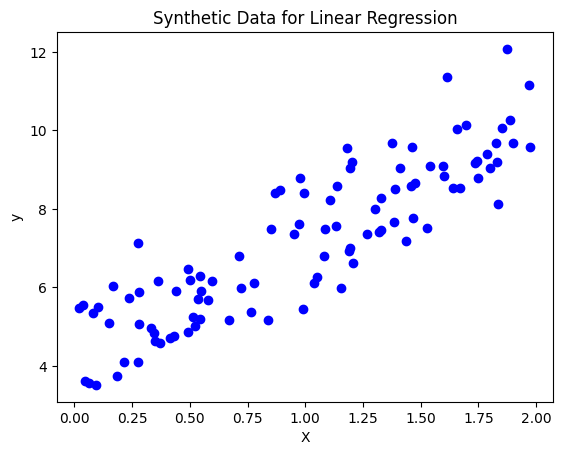

In [ ]:
# Let's start with data
X = 2 * np.random.rand(100,1)           # Create 100 random numbers between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise
# print(X)          # Just incase how actully number are seen
# print(y)

# First see how data looks like
plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data for Linear Regression")
plt.show()

# This data is good for linear regression you can see that data is linearly distributed

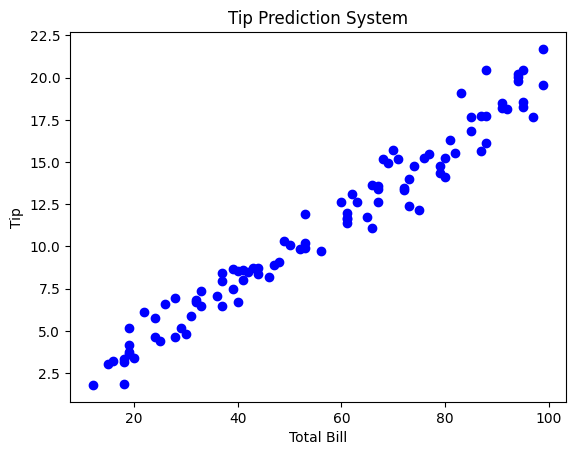

0.1983934123777122
0.042337504497455214


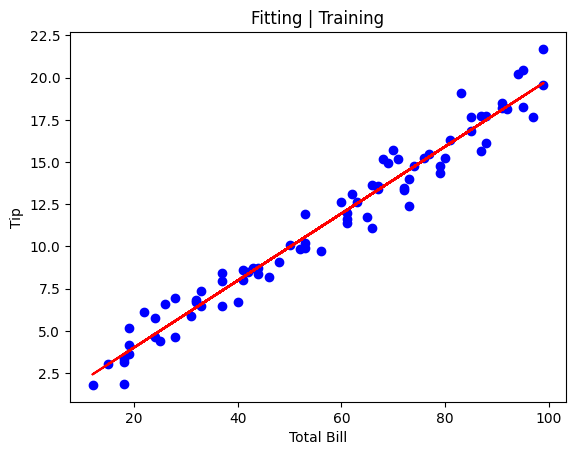

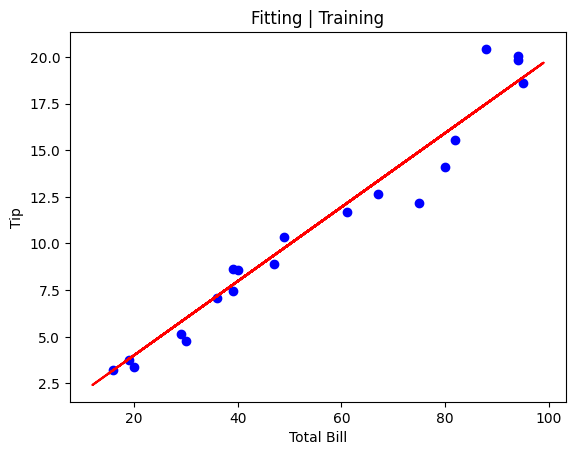

[ 5.99413988  9.76361471  7.77968059 12.14433566 18.69131827  7.77968059
  9.36682789 13.33469613  7.18450035 14.92184343  3.81181234  5.79574646
 18.88971168  3.2166321  18.69131827  4.01020575  7.978074   15.91381049
 16.31059732 17.50095779]
Mean Square Error: 1.399156539218329


In [ ]:
# If we have one 
# What if we follow actual problem statement, so you can understand better (bills and tips)
# For exaple we train model on already given data and when new bill amount is given we predict tip
# Let's see how data looks like
total_bill = np.random.randint(10, 100, 100)  # 100 random numbers between 10 and 100
tip = total_bill * 0.2 + np.random.randn(100)  # 20% tip + noise

# print(total_bill.shape)
# print(tip.shape)

# Plot the graph if you want
plt.scatter(total_bill, tip, color='blue')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Tip Prediction System")
plt.show()

# This sklearn sklearn class bill and tip are data, test size 0.2 mean 20% of data and random state 42 mean if you use 42 in your random state you will see result same as mine
X_train, X_test, y_train, y_test = train_test_split(total_bill, tip, test_size=0.2, random_state=42)


# how to find the line that best fits the data (linear regression) > y=mx+b
# currently we have 2 features (total_bill and tip) and we want to predict tip
# value at x-axis is total_bill and y-axis is tip

# In formula slope = m = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)^2)
# In formula intercept = b = y_mean - (m * x_mean)

# we have values of x and y so we can find m and b

# x_mean = total_bill/len(total_bill)
# y_mean = tip/len(tip)
# this mean is for whole values but we have to dive data into 2 parts then we will take mean of that part

# let' find slope m

# At first value of numerator and demurator both are 0

# lets create class and so that everything belong to one class just like room or your wallet
class Regression:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        numerator = 0
        denumerator = 0
        for i in range(X_train.shape[0]):
            numerator = numerator + ((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            denumerator = denumerator + ((X_train[i]-X_train.mean()) * (X_train[i]-X_train.mean()))
            
        self.m = numerator/denumerator
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(f"Value of Slope(m): {self.m}")           # this tells us how much money will go up for single dollar basically change
        print(f"value of intercept(b): {self.b}")       #
        
        
        plt.scatter(X_train, y_train, color='blue')
        plt.plot(X_train, self.m*X_train + self.b, color='red')
        plt.xlabel("Total Bill")
        plt.ylabel("Tip")
        plt.title("Fitting | Training")
        plt.show()

#  We will use 20% of data to predict tip, this time we will use only 1 feature total bill and see how tip look like then we will mathch with actual tip
    
    def predict(self, X_test):
        plt.scatter(X_test, y_test, color='blue')
        plt.plot(X_train, self.m*X_train + self.b, color='red')
        plt.xlabel("Total Bill")
        plt.ylabel("Tip")
        plt.title("Fitting | Training")
        plt.show()
        return (self.m * X_test) + self.b
    
    def mse(self, y_test, y_pred):
        return np.sum((y_test - y_pred)**2)/len(y_test)
    
    
# Now we will pass value for fit function and see the output
# But first let's break the data into 2 parts one for training and one for testing


model = Regression() # Create an instance of the class basically calling method of class
model.fit(X_train, y_train) # Fit the model on the training data
# print("Slope (m):", m)  # Print the final slope
# print("Intercept (b):", b)  # Print the final intercept

# Let's do prediction
y_pred = model.predict(X_test)
# print(y_pred)

# Let's calculate the mean squared error: basically average distance between actual and predicted value

mse = model.mse(y_test, y_pred)
print(f"Mean Square Error: {mse}")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate dataset
np.random.seed(42)  # For reproducibility
total_bill = np.random.randint(10, 100, 100).reshape((-1, 1))  # 100 random values between 10 and 100
tip = total_bill * 0.2 + np.random.randn(100)  # 20% tip + some random noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(total_bill, tip, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Coefficient (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)
print("Mean Squared Error:", mse)
print(f"Root Mean Square Error (RMSE): {np.sqrt(mse)}")
print("R-Squared (Accuracy -> SSR/SST):", r2)


Coefficient (m): [0.2]
Intercept (b): [-0.0435368  -0.27530091 -1.56306679 -0.79563099  0.9305844   0.67776741
  0.69844026  0.17360206  0.66228451  0.24112216 -0.16820509  1.16476865
 -0.24574769 -0.76966777  1.21217234  1.2334968  -1.57415529  0.63795294
 -2.04442302  1.06948089 -0.93376284  0.78420819 -0.61487576  0.33289244
 -1.38071702 -0.28080629 -0.05981726  0.96117377  1.79428084  0.58068954
  0.29765045 -1.02811577 -1.41859646  0.19033698  0.13575383  0.60808966
  0.70498131  0.36092338 -1.46696789  0.89262947 -0.10525713 -0.95534644
 -0.41476463 -1.39874088 -0.34408054  0.75078589 -0.32762518 -0.86159805
 -0.2581848   0.46095562 -1.34938997 -1.01907279  0.12701224 -1.24944372
  1.94511561 -0.15333646 -0.90698723 -0.81735416 -0.48312268 -0.56982835
 -2.09159967  1.26374053 -0.01548334 -0.02737645  0.81787351 -1.05460447
 -0.75832712  0.45741565 -0.06437805  0.34490234 -0.08008734 -0.24138013
  1.43351549  1.06579371 -2.49875914  1.48032856  2.15872852  1.23177838
 -0.21432448 

## Project

In [ ]:
data = pd.read_csv("D:\Machine learning\DataSets\placement_2.csv")
data.sample()

,cgpa,package
124,6.06,2.31


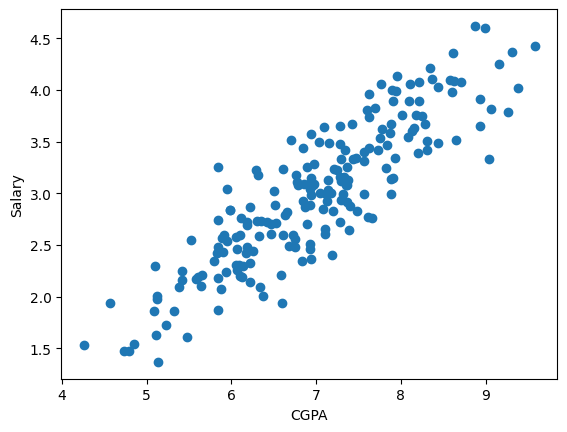

In [ ]:
# data.isnull().sum()
plt.scatter(data["cgpa"], data["package"])
plt.xlabel("CGPA")
plt.ylabel("Salary")
plt.show()

Cofficient:  [0.55795197]
Intercept:  -0.8961119222429144
Formula: y = [0.55795197] * x + -0.8961119222429144
Mean sqaure error: 0.12129235313495527
Root Square error: 0.780730147510384
Root Mean sqaure error: 0.34827051717731616


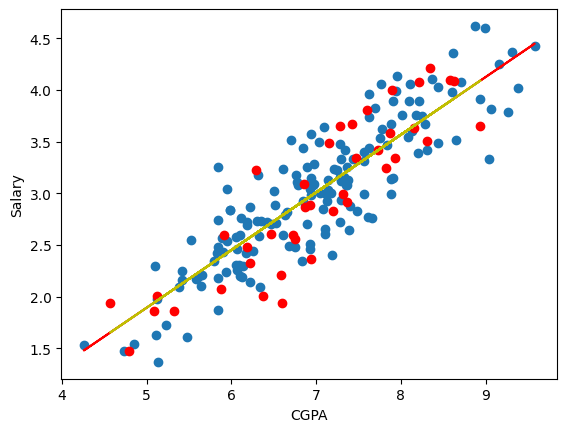

In [ ]:
X = data["cgpa"]
y = data["package"]
X = data.iloc[:,0:1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Cofficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)
print(f"Formula: y = {lr.coef_} * x + {lr.intercept_}")
print(f"Mean sqaure error: {mse}")
print(f"Root Square error: {r2}")
print(f"Root Mean sqaure error: {np.sqrt(mse)}")


plt.scatter(X_train, y_train)
plt.plot(X_train,lr.predict(X_train), color = "r")
plt.scatter(X_test,y_test, color="r")
plt.plot(X_test,y_pred, color="y")
plt.xlabel("CGPA")
plt.ylabel("Salary")
plt.show()


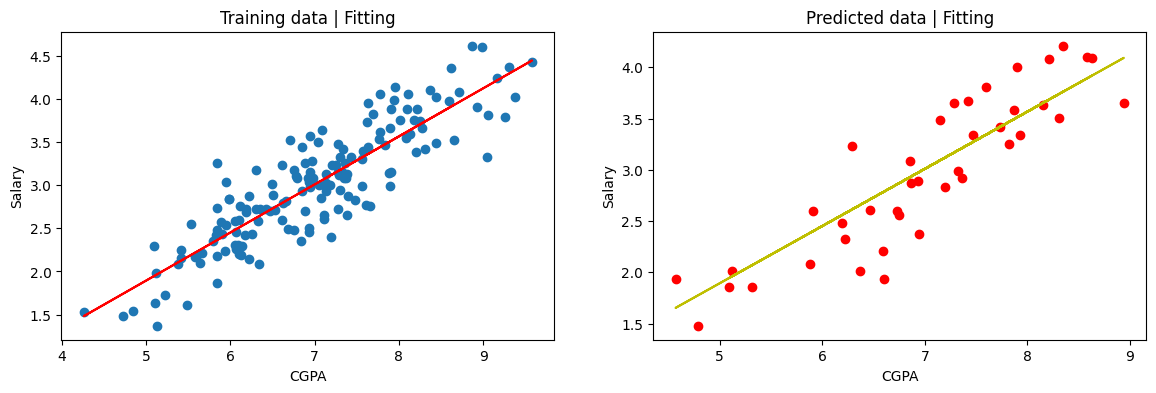

In [ ]:
# Let's separatly view the data
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_train,lr.predict(X_train), color = "r")
plt.title("Training data | Fitting")
plt.xlabel("CGPA")
plt.ylabel("Salary")

plt.subplot(122)
plt.scatter(X_test,y_test, color="r")
plt.plot(X_test,y_pred, color="y")
plt.title("Predicted data | Fitting")
plt.xlabel("CGPA")
plt.ylabel("Salary")
plt.show()

## Project - Better understanding

Coffitient of determination: 0.9673358126537991
Intercept: 12.461758107281257
Slope: [0.9169896]
Predicted Response: [14.2957373  15.2127269  16.1297165  16.1297165  17.0467061  18.88068529
 19.79767489 20.71466449 23.46563329 24.38262288 26.21660208 28.05058128
 28.96757087 29.88456047 32.63552927 34.46950846 37.22047726 39.97144605
 40.88843565 43.63940445]


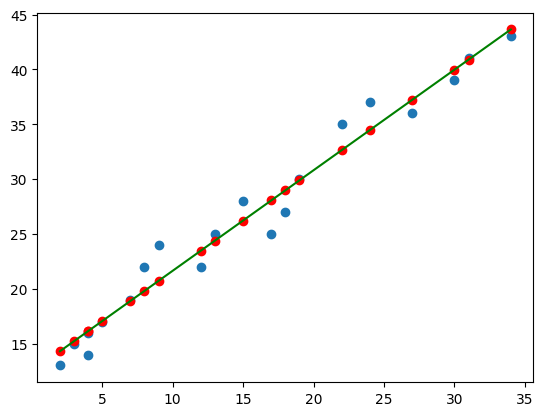

In [ ]:
x = np.array([2,3,4,4,5,7,8,9,12,13,15,17,18,19,22,24,27,30,31,34]).reshape((-1,1))
y = np.array([13,15,16,14,17,19,22,24,22,25,28,25,27,30,35,37,36,39,41,43])

model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
print(f"Coffitient of determination: {r_sq}")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")
y_pred = model.predict(x)
print(f"Predicted Response: {y_pred}")
plt.scatter(x,y)
plt.plot(x,model.predict(x), color = "green")
plt.scatter(x,model.predict(x), color = "red")
plt.show()

## Real world Project - Total bill tip

In [ ]:
df = sns.load_dataset("tips")
df.sample(2)

,total_bill,tip,sex,smoker,day,time,size
15,21.58,3.92,Male,No,Sun,Dinner,2
147,11.87,1.63,Female,No,Thur,Lunch,2


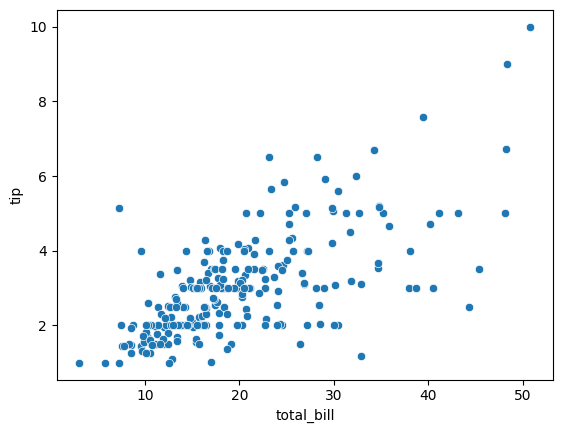

In [ ]:
sns.scatterplot(x = df["total_bill"], y = df["tip"], data=df)
X = df[['total_bill']]
y = df["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print('R-squared:', r2_score(y_test, y_pred))

Mean squared error: 0.5688142529229538
R-squared: 0.5449381659234663


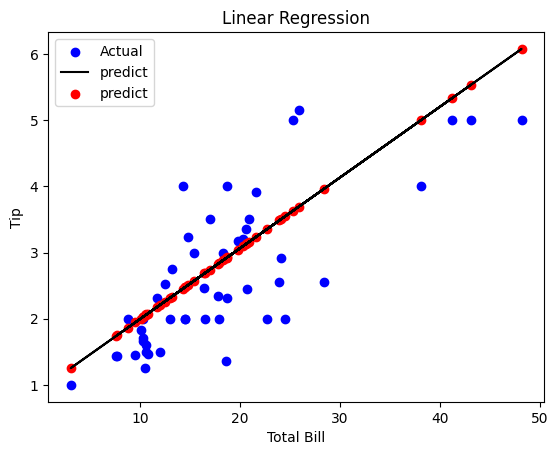

In [ ]:
plt.scatter(X_test, y_test, color="blue", label = "Actual")
plt.plot(X_test, y_pred,label = "predict",color="black")
plt.scatter(X_test, y_pred, color="red", label = "predict")
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Project - Real Estate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load Dataset (or generate synthetic data if unavailable) , Also you can use kaggle
data = {
    'Size_sqft': np.random.randint(800, 4000, 100),
    'Bedrooms': np.random.randint(1, 5, 100),
    'Bathrooms': np.random.randint(1, 4, 100),
    'Age_of_House': np.random.randint(1, 50, 100),
    'Location': np.random.choice(['Downtown', 'Suburb', 'Countryside'], 100),
    'Price': np.random.randint(50000, 500000, 100)  # Target variable
}
df = pd.DataFrame(data)

# Display dataset information
print("Dataset Preview:\n", df.head())
print("\nDataset Info:")
df.info()

# Save the dataset as CSV for future use
df.to_csv("real_estate_data.csv", index=False)

Dataset Preview:
    Size_sqft  Bedrooms  Bathrooms  Age_of_House  Location   Price
0       3320         4          1            40  Downtown  228677
1       2769         1          1            10    Suburb  433934
2       2998         1          1            43    Suburb  417760
3       2238         2          3            44  Downtown  481304
4       2434         1          2            29  Downtown  390896

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Size_sqft     100 non-null    int32 
 1   Bedrooms      100 non-null    int32 
 2   Bathrooms     100 non-null    int32 
 3   Age_of_House  100 non-null    int32 
 4   Location      100 non-null    object
 5   Price         100 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 2.9+ KB


In [ ]:
df = pd.read_csv("real_estate_data.csv")
df.head()  # Display the first 5 rows

,Size_sqft,Bedrooms,Bathrooms,Age_of_House,Location,Price
0,3320,4,1,40,Downtown,228677
1,2769,1,1,10,Suburb,433934
2,2998,1,1,43,Suburb,417760
3,2238,2,3,44,Downtown,481304
4,2434,1,2,29,Downtown,390896


In [ ]:
# Preprocessing, Data checkup
print(df.isnull().sum())  # Count missing values in each column

Size_sqft       0
Bedrooms        0
Bathrooms       0
Age_of_House    0
Location        0
Price           0
dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)  # Convert categorical to numerical

In [ ]:
X = df.drop(columns=['Price'])  # Features (Independent Variables)
y = df['Price']  # Target Variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 107000.13998417715
Mean Squared Error (MSE): 15013436750.340246
Root Mean Squared Error (RMSE): 122529.33016359898
R² Score: 0.0028247645704055913


In [ ]:
# Let's predict single house price
sample_house = np.array([[2500, 3, 2, 10, 1, 0]])  # Example house: [size, bedrooms, bathrooms, age, location_NYC, location_LA]
predicted_price = model.predict(sample_house)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $294,585.57


C:\Users\Abdullah khan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
